In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score



In [9]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Crime_prone_dataset.csv')

In [10]:
# Perform exploratory data analysis
print(df.head())
print(df.describe())


  District         Event Circle Police Station Caller Source  \
0  LUCKNOW  P01042100004     C1            PS1         PHONE   
1  LUCKNOW  P01042104316     C1            PS1         PHONE   
2  LUCKNOW  P01042104847     C1            PS1         PHONE   
3  LUCKNOW  P01042105074     C1            PS1         PHONE   
4  LUCKNOW  P01042105152     C1            PS1         PHONE   

                   Event Type       Event Sub-Type  Create Date/Time  \
0  Information Against Police   Misbehavior By Prv  01-04-2021 00:00   
1            Threat In Person               Attack  01-04-2021 12:09   
2                     Dispute  Dispute In Hospital  01-04-2021 12:51   
3                    Gambling           Play Cards  01-04-2021 13:10   
4            Threat In Person               Attack  01-04-2021 13:18   

   Latitude  Longitude  
0    26.834     81.008  
1    26.828     81.014  
2    26.840     81.009  
3    26.828     81.002  
4    26.834     81.033  
          Latitude    Longitude


In [11]:
# Preprocess the data
# Drop irrelevant columns
df = df.drop(['District','Event', 'Circle', 'Caller Source',], axis=1)

In [12]:
# Replace missing values with the mean value of the column
df = df.fillna(df.mean())

label_encoder = LabelEncoder()
df['Police Station'] = label_encoder.fit_transform(df['Police Station'])
print(df['Police Station'])

0       0
1       0
2       0
3       0
4       0
       ..
5123    3
5124    3
5125    3
5126    3
5127    3
Name: Police Station, Length: 5128, dtype: int32


In [13]:
# Normalize the data using StandardScaler

scaler = StandardScaler()

X = df.drop(['Police Station'], axis=1)

# Select only the columns with numeric data types
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Fit and transform the selected columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Assign the scaled values back to the original dataframe
df[X.columns] = X
X

,Event Type,Event Sub-Type,Create Date/Time,Latitude,Longitude
0,Information Against Police,Misbehavior By Prv,01-04-2021 00:00,-0.546530,-0.170541
1,Threat In Person,Attack,01-04-2021 12:09,-0.655086,-0.103913
2,Dispute,Dispute In Hospital,01-04-2021 12:51,-0.437974,-0.159436
3,Gambling,Play Cards,01-04-2021 13:10,-0.655086,-0.237169
4,Threat In Person,Attack,01-04-2021 13:18,-0.546530,0.107075
...,...,...,...,...,...
5123,Dispute,With Neighbor,30-06-2021 17:59,0.032435,0.029342
5124,Dispute,Dispute Between Ride And Driver,30-06-2021 18:01,-0.003750,-0.192750
5125,Cyber Crimes,Bank Account Hacking,30-06-2021 18:10,-0.003750,-0.281587
5126,Robbery,On Road,30-06-2021 18:33,0.159083,-0.003972


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the data and transform the data
X_encoded = encoder.fit_transform(X)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['Police Station'], test_size=0.2, random_state=42)


In [16]:
# Train and evaluate a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print('Decision Tree Classifier Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Decision Tree Classifier Results:
Accuracy: 0.9122807017543859
Confusion Matrix:
[[145  13   0   0]
 [  7 225  12   4]
 [  2  20 440  13]
 [  0   4  15 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.86      0.91      0.88       248
           2       0.94      0.93      0.93       475
           3       0.88      0.87      0.87       145

    accuracy                           0.91      1026
   macro avg       0.91      0.91      0.91      1026
weighted avg       0.91      0.91      0.91      1026



In [30]:
# Train and evaluate a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(y_pred)
print('Random Forest Classifier Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

[2 2 2 ... 1 2 0]
Random Forest Classifier Results:
Accuracy: 0.9103313840155945
Confusion Matrix:
[[128  10  19   1]
 [  4 234  10   0]
 [  1  12 454   8]
 [  0  11  16 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       158
           1       0.88      0.94      0.91       248
           2       0.91      0.96      0.93       475
           3       0.93      0.81      0.87       145

    accuracy                           0.91      1026
   macro avg       0.92      0.88      0.90      1026
weighted avg       0.91      0.91      0.91      1026



In [18]:
# Train and evaluate a Support Vector Machine classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print('Support Vector Machine Classifier Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Support Vector Machine Classifier Results:
Accuracy: 0.9317738791423001
Confusion Matrix:
[[127   6  25   0]
 [  5 236   6   1]
 [  2   3 463   7]
 [  0   5  10 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       158
           1       0.94      0.95      0.95       248
           2       0.92      0.97      0.95       475
           3       0.94      0.90      0.92       145

    accuracy                           0.93      1026
   macro avg       0.94      0.91      0.92      1026
weighted avg       0.93      0.93      0.93      1026



In [19]:
# Train and evaluate a K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_encoded)
y_pred = kmeans.predict(X_encoded)
print('K-means Clustering Results:')
print('Silhouette Score:', silhouette_score(X_encoded, y_pred))
print('Cluster Centers:', kmeans.cluster_centers_)
print(y_pred)

K-means Clustering Results:
Silhouette Score: 0.08164712246479305
Cluster Centers: [[0.00706861 0.0004158  0.02577963 ... 0.0004158  0.         0.0004158 ]
 [0.         0.         0.         ... 0.         0.00064558 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 3 1 ... 0 0 3]


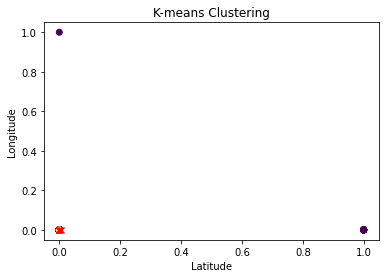

In [20]:
import plotly.express as px

# Assume X_encoded has more than two columns
# Create a new DataFrame with the encoded data and the predicted clusters
# df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())
# df['cluster'] = y_pred
plt.scatter(X_encoded.toarray()[:, 0], X_encoded.toarray()[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
# Create a parallel coordinates plot of the data
# fig = px.parallel_coordinates(df, color='cluster', color_continuous_scale='viridis')
# fig.show()
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [21]:
import pickle

In [22]:
pickle.dump(rf_classifier, open('model.pkl','wb'))

In [23]:
model=pickle.load(open('model.pkl','rb'))

In [28]:
print(model.predict(X_test))

[2 2 2 ... 1 2 0]
